In [12]:
import pandas as pd

df = pd.read_csv('data/cleaned_messages.csv')

# Find Average Read Time
Here we will find the average time it takes me to read a message. We will only do my side because the data for my wife's response time is mostly not there

In [13]:
me_df = df[df.sender == 'Me']
me_df['read_time_in_seconds'].mean()

np.float64(4.410355029585799)

## Average Read Time
The average read time for me is 4.41 seconds

# Find Average Response Time

In [14]:
calc_df = df.copy()
calc_df['timestamp'] = pd.to_datetime(calc_df['date'] + ' ' + calc_df['time'])
calc_df['time_difference'] = calc_df['timestamp'].diff()
calc_df.head()

,sender,message,reaction,edits,attachmentLinks,replyAnchor,appSent,date,time,read_time,read_time_in_seconds,timestamp,time_difference
0,Me,You're coming tonight right?,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:18 AM,(Read by them after 1 second),1.0,2021-09-28 10:21:18,NaT
1,My Wife,yeah i think i'm going to lol,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:30 AM,(Read by you after 1 second),1.0,2021-09-28 10:21:30,0 days 00:00:12
2,Me,You think?! Nah you're for sure coming,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:46 AM,NaN,NaN,2021-09-28 10:21:46,0 days 00:00:16
3,My Wife,"wow peer pressure over here, geez guess i will go",NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:22:20 AM,(Read by you after 9 seconds),9.0,2021-09-28 10:22:20,0 days 00:00:34
4,Me,That's what I like to hear lol,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:22:54 AM,(Read by them after 1 second),1.0,2021-09-28 10:22:54,0 days 00:00:34


In [15]:
me_df = calc_df[calc_df['sender'] == 'Me']
wife_df = calc_df[calc_df['sender'] == 'My Wife']

print(f"My Average Response Time: {me_df['time_difference'].mean()}")
print(f"My Wife's Average Response Time: {wife_df['time_difference'].mean()}")
print(f"Our Combined Average Response Time: {(wife_df['time_difference'].mean() + me_df['time_difference'].mean()) / 2}")

My Average Response Time: 0 days 00:16:52.713757615
My Wife's Average Response Time: 0 days 00:26:58.079543698
Our Combined Average Response Time: 0 days 00:21:55.396650656


## Average Response Times:

- **Me:** 16 Minutes and 53 Seconds


- **My Wife:** 26 Minutes and 58 Seconds 


- **Combined:** 21 Minutes and 55 Seconds

# Message Analysis

Here we are going to look at:

- How many messages we each have sent
- How many characters we each have used
- How many words we each have used
- How many unique words we each have used

## Step 1: Messages Sent

In [16]:
me_df = df[df['sender'] == 'Me']
wife_df = df[df['sender'] == 'My Wife']

my_count = me_df['message'].count()
wife_count = wife_df['message'].count()

print(f"Number of messages I've sent: {my_count}")
print(f"Number of messages my wife has sent: {wife_count}")
print(f'Number of messages we\'ve sent in total: {my_count + wife_count}')

Number of messages I've sent: 33498
Number of messages my wife has sent: 31875
Number of messages we've sent in total: 65373


## Step 2: How many characters we have used

In [17]:
my_count = me_df['message'].apply(lambda x: len(str(x))).sum()
wife_count = wife_df['message'].apply(lambda x: len(str(x))).sum()

print(f'Number of characters I\'ve used: {my_count}')
print(f'Number of characters my wife has used: {wife_count}')
print(f'Number of characters we\'ve used: {my_count + wife_count}')

Number of characters I've used: 1421613
Number of characters my wife has used: 1237373
Number of characters we've used: 2658986


## Step 3: Number of words used 

In [18]:
my_count = me_df['message'].apply(lambda x: len(str(x).split())).sum()
wife_count = wife_df['message'].apply(lambda x: len(str(x).split())).sum()

print(f'Number of words I\'ve used: {my_count}')
print(f'Number of words my wife has used: {wife_count}')
print(f'Number of words we\'ve used: {my_count + wife_count}')

Number of words I've used: 291100
Number of words my wife has used: 258687
Number of words we've used: 549787


## Step 4: Number of Unique Words Used

In [19]:
my_words = me_df['message'].apply(lambda x: str(x).split())
my_word_list = my_words.sum()

unique_list = set(my_word_list)

print(f"Number of Unique Words I've Used: {len(unique_list)}")

Number of Unique Words I've Used: 17299


In [20]:
wife_words = wife_df['message'].apply(lambda x: str(x).split())
wife_word_list = wife_words.sum()

wife_unique_list = set(wife_word_list)

print(f"Number of Unique Words My Wife Has Used: {len(wife_unique_list)}")

Number of Unique Words My Wife Has Used: 16479


In [21]:
combined = set(wife_unique_list | unique_list)
print(f"Number of Unique Words between the both of us: {len(combined)}")

Number of Unique Words between the both of us: 25953


# Message Analysis End

* Number of messages sent:
    - **Me:** 33,498 messages
    - **My Wife:** 31,875 messages
    - **Combined:** 65,373 messages
* Number of Characters Used:
    - **Me:** 1,421,613 characters
    - **My Wife:** 1,237,373 characters
    - **Combined:** 2,658,986 characters
* Number of Words Used:
    - **Me:** 291,100 words
    - **My Wife:** 258,687 words
    - **Combined:** 549,787 words
* Number of Unique Words Used:
    - **Me:** 17,299 Unique Words
    - **My Wife:** 16,479 Unique Words
    - **Combined:** 25,953 Unique Words
    

# Content Analysis

Here I want to get how many attachments we have sent

In [22]:
my_attachments_df = me_df[me_df['attachmentLinks'].notna()]
my_attachments = my_attachments_df['attachmentLinks'].sum()
print(f"Number of attachments I've sent: {len(my_attachments)}")

wife_attachments_df = wife_df[wife_df['attachmentLinks'].notna()]
wife_attachments = wife_attachments_df['attachmentLinks'].sum()
print(f"Number of attachments my wife has sent: {len(wife_attachments)}")

print(f'Number of attachments sent between the both of us: {len(my_attachments) + len(wife_attachments)}')

Number of attachments I've sent: 22440
Number of attachments my wife has sent: 31484
Number of attachments sent between the both of us: 53924


# Double Texts
I want to find how many double texts were sent between both me and my wife.

In [23]:
double_texts_df = df[['sender', 'message']]

double_texts_df = double_texts_df.assign(double_text=double_texts_df.sender.eq(double_texts_df.sender.shift()))

print(f"Number of time I have double texted: {double_texts_df.loc[(double_texts_df.sender == 'Me') & (double_texts_df.double_text)].double_text.count()}")
print(f"Number of times my wife has double texted: {double_texts_df.loc[(double_texts_df.sender == 'Ashlyn') & (double_texts_df.double_text)].double_text.count()}")
print(f"Total number of double texts: {double_texts_df.loc[(double_texts_df.double_text)].double_text.count()}")

Number of time I have double texted: 6533
Number of times my wife has double texted: 0
Total number of double texts: 11598


# Message Times Heatmap

The goal here is to create at least one heatmap on when we typically message each other 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

calc_df.head()

,sender,message,reaction,edits,attachmentLinks,replyAnchor,appSent,date,time,read_time,read_time_in_seconds,timestamp,time_difference
0,Me,You're coming tonight right?,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:18 AM,(Read by them after 1 second),1.0,2021-09-28 10:21:18,NaT
1,My Wife,yeah i think i'm going to lol,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:30 AM,(Read by you after 1 second),1.0,2021-09-28 10:21:30,0 days 00:00:12
2,Me,You think?! Nah you're for sure coming,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:21:46 AM,NaN,NaN,2021-09-28 10:21:46,0 days 00:00:16
3,My Wife,"wow peer pressure over here, geez guess i will go",NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:22:20 AM,(Read by you after 9 seconds),9.0,2021-09-28 10:22:20,0 days 00:00:34
4,Me,That's what I like to hear lol,NaN,NaN,NaN,NaN,NaN,"Sep 28, 2021",10:22:54 AM,(Read by them after 1 second),1.0,2021-09-28 10:22:54,0 days 00:00:34


In [25]:
converted_df = calc_df[['date', 'time']]
converted_df = converted_df.assign(time=pd.to_datetime(converted_df['time'], format="%I:%M:%S %p"))
converted_df

,date,time
0,"Sep 28, 2021",1900-01-01 10:21:18
1,"Sep 28, 2021",1900-01-01 10:21:30
2,"Sep 28, 2021",1900-01-01 10:21:46
3,"Sep 28, 2021",1900-01-01 10:22:20
4,"Sep 28, 2021",1900-01-01 10:22:54
...,...,...
66157,"Jun 26, 2024",1900-01-01 13:15:45
66158,"Jun 26, 2024",1900-01-01 13:19:20
66159,"Jun 26, 2024",1900-01-01 13:19:40
66160,"Jun 26, 2024",1900-01-01 13:26:12


In [26]:
converted_df = converted_df.assign(day_of_week=pd.to_datetime(converted_df['date']).dt.day_name())
converted_df

,date,time,day_of_week
0,"Sep 28, 2021",1900-01-01 10:21:18,Tuesday
1,"Sep 28, 2021",1900-01-01 10:21:30,Tuesday
2,"Sep 28, 2021",1900-01-01 10:21:46,Tuesday
3,"Sep 28, 2021",1900-01-01 10:22:20,Tuesday
4,"Sep 28, 2021",1900-01-01 10:22:54,Tuesday
...,...,...,...
66157,"Jun 26, 2024",1900-01-01 13:15:45,Wednesday
66158,"Jun 26, 2024",1900-01-01 13:19:20,Wednesday
66159,"Jun 26, 2024",1900-01-01 13:19:40,Wednesday
66160,"Jun 26, 2024",1900-01-01 13:26:12,Wednesday


In [27]:
heatmap_df = converted_df[['time', 'day_of_week']]

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
# labels = ['Early Morning', 'Morning', 'Afternoon', 'Late Night']
labels = ['12AM-3AM', '3AM-6AM', '6AM-9AM', '9AM-12PM', '12PM-3PM', '3PM-6PM', '6PM-9PM', '9PM-12AM']
heatmap_df['Time Bin'] = pd.cut(heatmap_df.time.dt.hour, bins, labels=labels, right=False)

heatmap_df['Hour'] = heatmap_df['time'].dt.hour
heatmap_df = heatmap_df[['day_of_week', 'Hour', 'Time Bin']]
heatmap_df

,day_of_week,Hour,Time Bin
0,Tuesday,10,9AM-12PM
1,Tuesday,10,9AM-12PM
2,Tuesday,10,9AM-12PM
3,Tuesday,10,9AM-12PM
4,Tuesday,10,9AM-12PM
...,...,...,...
66157,Wednesday,13,12PM-3PM
66158,Wednesday,13,12PM-3PM
66159,Wednesday,13,12PM-3PM
66160,Wednesday,13,12PM-3PM


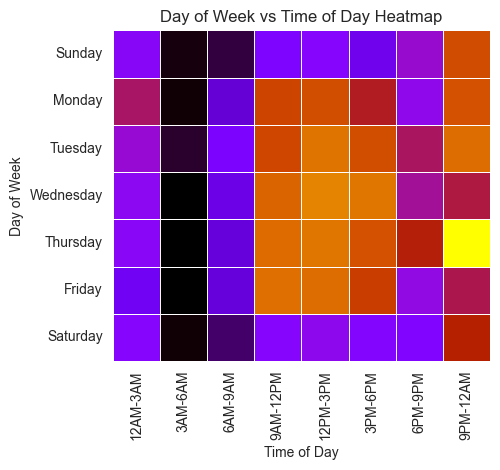

In [28]:
pivot = heatmap_df.pivot_table(index="day_of_week", columns="Time Bin", values="Hour", aggfunc='count', observed=True)

pivot.index = pd.CategoricalIndex(pivot.index, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
pivot.sort_index(level=0, inplace=True)

ax = sns.heatmap(pivot, cmap="gnuplot", cbar=False, linewidths=0.5, square=True)

ax.set(xlabel='Time of Day', ylabel='Day of Week', title='Day of Week vs Time of Day Heatmap')
plt.tight_layout()
plt.savefig('images/day_of_week_heatmap.png')
plt.show()

# Heatmap of Month vs Year


In [29]:
mo_df = calc_df[['date', 'message']]
mo_df

,date,message
0,"Sep 28, 2021",You're coming tonight right?
1,"Sep 28, 2021",yeah i think i'm going to lol
2,"Sep 28, 2021",You think?! Nah you're for sure coming
3,"Sep 28, 2021","wow peer pressure over here, geez guess i will go"
4,"Sep 28, 2021",That's what I like to hear lol
...,...,...
66157,"Jun 26, 2024",i think they'll go with ours
66158,"Jun 26, 2024",I think they will too
66159,"Jun 26, 2024",it'll be cute
66160,"Jun 26, 2024",& this one has poppies


In [30]:
mo_df['month'] = pd.to_datetime(mo_df['date']).dt.month_name()
mo_df['year'] = pd.to_datetime(mo_df['date']).dt.year
mo_df

/var/folders/63/ft_13z3s7kj93h80hctc1lnm0000gn/T/ipykernel_769/2451291245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_df['month'] = pd.to_datetime(mo_df['date']).dt.month_name()
/var/folders/63/ft_13z3s7kj93h80hctc1lnm0000gn/T/ipykernel_769/2451291245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_df['year'] = pd.to_datetime(mo_df['date']).dt.year


,date,message,month,year
0,"Sep 28, 2021",You're coming tonight right?,September,2021
1,"Sep 28, 2021",yeah i think i'm going to lol,September,2021
2,"Sep 28, 2021",You think?! Nah you're for sure coming,September,2021
3,"Sep 28, 2021","wow peer pressure over here, geez guess i will go",September,2021
4,"Sep 28, 2021",That's what I like to hear lol,September,2021
...,...,...,...,...
66157,"Jun 26, 2024",i think they'll go with ours,June,2024
66158,"Jun 26, 2024",I think they will too,June,2024
66159,"Jun 26, 2024",it'll be cute,June,2024
66160,"Jun 26, 2024",& this one has poppies,June,2024


In [31]:
mo_df = mo_df[['month', 'year', 'message']]
mo_df

,month,year,message
0,September,2021,You're coming tonight right?
1,September,2021,yeah i think i'm going to lol
2,September,2021,You think?! Nah you're for sure coming
3,September,2021,"wow peer pressure over here, geez guess i will go"
4,September,2021,That's what I like to hear lol
...,...,...,...
66157,June,2024,i think they'll go with ours
66158,June,2024,I think they will too
66159,June,2024,it'll be cute
66160,June,2024,& this one has poppies


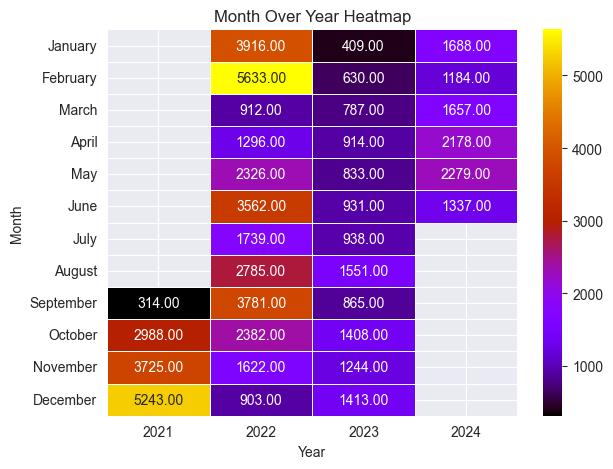

In [32]:
mo_pivot = mo_df.pivot_table(index='month', columns='year', values='message', aggfunc='count', observed=True)

mo_pivot.index = pd.CategoricalIndex(mo_pivot.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
mo_pivot.sort_index(level=0, inplace=True)

ax = sns.heatmap(mo_pivot, cmap="gnuplot", linewidths=0.5, square=False, annot=True, fmt='.2f')

ax.set(xlabel='Year', ylabel='Month', title="Month Over Year Heatmap")
plt.tight_layout()
plt.savefig('images/month_over_year_heatmap.png')
plt.show()

# Heatmap of Month vs Day

In [33]:
md_df = pd.DataFrame(calc_df['date'])
md_df

,date
0,"Sep 28, 2021"
1,"Sep 28, 2021"
2,"Sep 28, 2021"
3,"Sep 28, 2021"
4,"Sep 28, 2021"
...,...
66157,"Jun 26, 2024"
66158,"Jun 26, 2024"
66159,"Jun 26, 2024"
66160,"Jun 26, 2024"


In [34]:
md_df['month'] = pd.to_datetime(md_df['date']).dt.month_name()
md_df['day_of_week'] = pd.to_datetime(md_df['date']).dt.day_name()
md_df

,date,month,day_of_week
0,"Sep 28, 2021",September,Tuesday
1,"Sep 28, 2021",September,Tuesday
2,"Sep 28, 2021",September,Tuesday
3,"Sep 28, 2021",September,Tuesday
4,"Sep 28, 2021",September,Tuesday
...,...,...,...
66157,"Jun 26, 2024",June,Wednesday
66158,"Jun 26, 2024",June,Wednesday
66159,"Jun 26, 2024",June,Wednesday
66160,"Jun 26, 2024",June,Wednesday


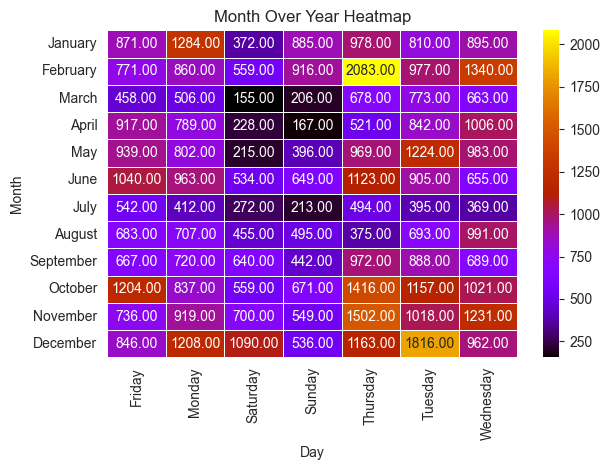

In [35]:
md_pivot = md_df.pivot_table(index='month', columns='day_of_week', values='date', aggfunc='count', observed=True)

md_pivot.index = pd.CategoricalIndex(md_pivot.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
md_pivot.sort_index(level=0, inplace=True)

ax = sns.heatmap(md_pivot, cmap="gnuplot", linewidths=0.5, square=False, annot=True, fmt='.2f')

ax.set(xlabel='Day', ylabel='Month', title="Month Over Year Heatmap")
plt.tight_layout()
plt.savefig('images/day_over_month_heatmap.png')
plt.show()